# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [363]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [364]:
# Suppress warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [365]:
# Load dataset
data = pd.read_csv("../air_quality_raw.csv", sep =";")
data.head().style.background_gradient(cmap="viridis")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.000000,150.000000,"11,9",1046.000000,166.000000,1056.000000,113.000000,1692.000000,1268.000000,"13,6","48,9","0,7578",nan,nan
1,10/03/2004,19.00.00,2,1292.000000,112.000000,"9,4",955.000000,103.000000,1174.000000,92.000000,1559.000000,972.000000,"13,3","47,7","0,7255",nan,nan
2,10/03/2004,20.00.00,"2,2",1402.000000,88.000000,"9,0",939.000000,131.000000,1140.000000,114.000000,1555.000000,1074.000000,"11,9","54,0","0,7502",nan,nan
3,10/03/2004,21.00.00,"2,2",1376.000000,80.000000,"9,2",948.000000,172.000000,1092.000000,122.000000,1584.000000,1203.000000,"11,0","60,0","0,7867",nan,nan
4,10/03/2004,22.00.00,"1,6",1272.000000,51.000000,"6,5",836.000000,131.000000,1205.000000,116.000000,1490.000000,1110.000000,"11,2","59,6","0,7888",nan,nan


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [366]:
# 1. Number of rows and columns in the dataset
print("Dataset structure:")
print("Number of rows:",data.shape[0])
print("Number of columns:", data.shape[1])

Dataset structure:
Number of rows: 9471
Number of columns: 17


In [367]:
# 2. Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [368]:
# 3. List of numerical columns
numerical_columns = data.select_dtypes(exclude="object").columns
print("Numerical Variables:", numerical_columns)

Numerical Variables: Index(['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [369]:
# 4. List of categorical columns
categorical_columns = data.select_dtypes(include="object").columns
print("Categorical Variables:", categorical_columns)

Categorical Variables: Index(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], dtype='object')


In [370]:
# 5. Unique values
print("Total Unique Values in Each Column:")
data.nunique()

Total Unique Values in Each Column:


Date              391
Time               24
CO(GT)            104
PT08.S1(CO)      1042
NMHC(GT)          430
C6H6(GT)          408
PT08.S2(NMHC)    1246
NOx(GT)           926
PT08.S3(NOx)     1222
NO2(GT)           284
PT08.S4(NO2)     1604
PT08.S5(O3)      1744
T                 437
RH                754
AH               6684
Unnamed: 15         0
Unnamed: 16         0
dtype: int64

In [371]:
# 6. Check duplicated data
print("Duplicated values :", data.duplicated().sum())

Duplicated values : 113


In [372]:
# 7. Total missing values in each column
missing_values = data.isna().sum()

print("Missing Value:")
display(missing_values.to_frame(name="Total Missing Value").style.background_gradient("viridis"))

Missing Value:


,Total Missing Value
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [373]:
# 8. Check outliers
outlier_info = []

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    outlier_info.append({
        "Column": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outlier_count,
        "Outlier Percentage": (outlier_count / len(data)) * 100
    })

outlier_data = pd.DataFrame(outlier_info)

display(outlier_data.style.background_gradient(cmap="viridis"))


,Column,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage
0,PT08.S1(CO),471.000000,1671.000000,484,5.110337
1,NMHC(GT),-200.000000,-200.000000,914,9.650512
2,PT08.S2(NMHC),120.000000,1696.000000,426,4.497941
3,NOx(GT),-301.000000,635.000000,509,5.374300
4,PT08.S3(NOx),152.500000,1444.500000,602,6.356245
5,NO2(GT),-67.000000,253.000000,1696,17.907296
6,PT08.S4(NO2),469.500000,2377.500000,450,4.751346
7,PT08.S5(O3),-132.500000,2087.500000,458,4.835815
8,Unnamed: 15,nan,nan,0,0.000000
9,Unnamed: 16,nan,nan,0,0.000000


In [374]:
# 9. Descriptive statistics
data_desc_stat = (
    data[numerical_columns].describe().T.style
    .background_gradient(cmap="viridis")
    .set_caption("Descriptive Statistics of Numeric Variables")
)

data_desc_stat

,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),9357.000000,1048.990061,329.832710,-200.000000,921.000000,1053.000000,1221.000000,2040.000000
NMHC(GT),9357.000000,-159.090093,139.789093,-200.000000,-200.000000,-200.000000,-200.000000,1189.000000
PT08.S2(NMHC),9357.000000,894.595276,342.333252,-200.000000,711.000000,895.000000,1105.000000,2214.000000
NOx(GT),9357.000000,168.616971,257.433866,-200.000000,50.000000,141.000000,284.000000,1479.000000
PT08.S3(NOx),9357.000000,794.990168,321.993552,-200.000000,637.000000,794.000000,960.000000,2683.000000
NO2(GT),9357.000000,58.148873,126.940455,-200.000000,53.000000,96.000000,133.000000,340.000000
PT08.S4(NO2),9357.000000,1391.479641,467.210125,-200.000000,1185.000000,1446.000000,1662.000000,2775.000000
PT08.S5(O3),9357.000000,975.072032,456.938184,-200.000000,700.000000,942.000000,1255.000000,2523.000000
Unnamed: 15,0.000000,nan,nan,nan,nan,nan,nan,nan
Unnamed: 16,0.000000,nan,nan,nan,nan,nan,nan,nan


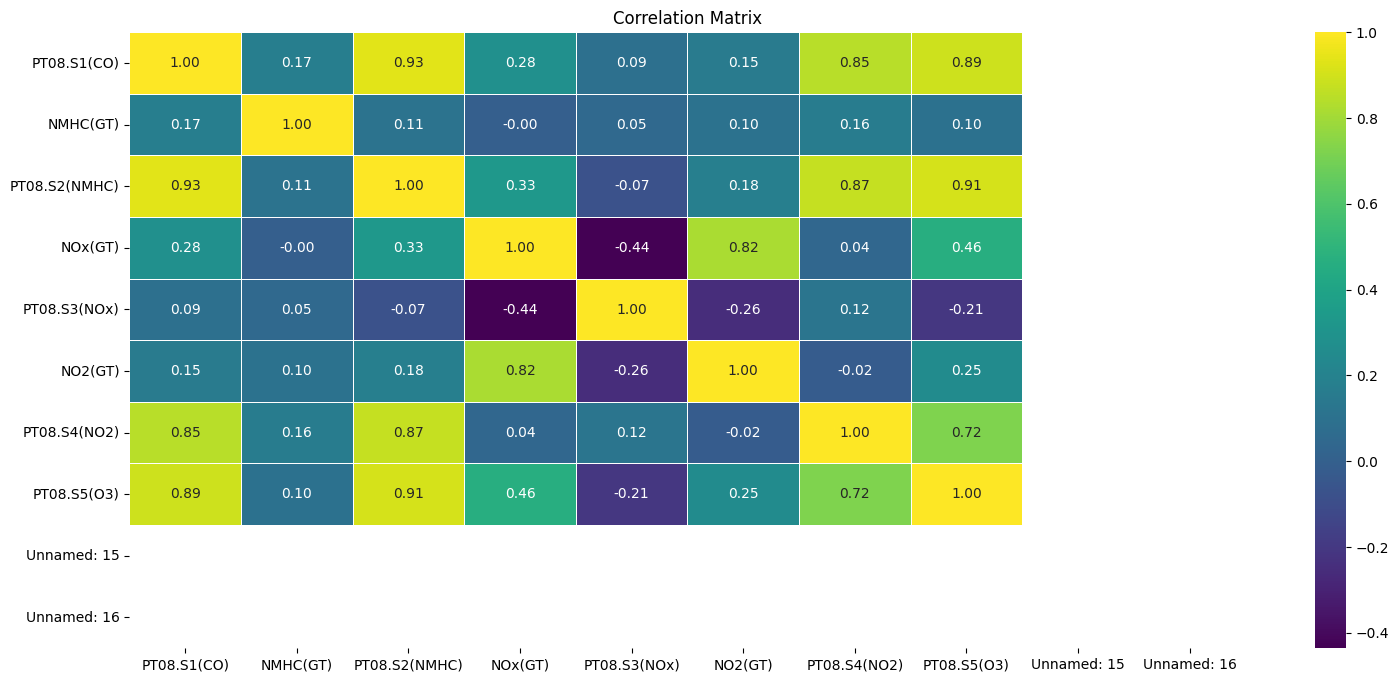

In [375]:
# 10. Correlation matrix
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.7)
plt.title("Correlation Matrix")
plt.show()

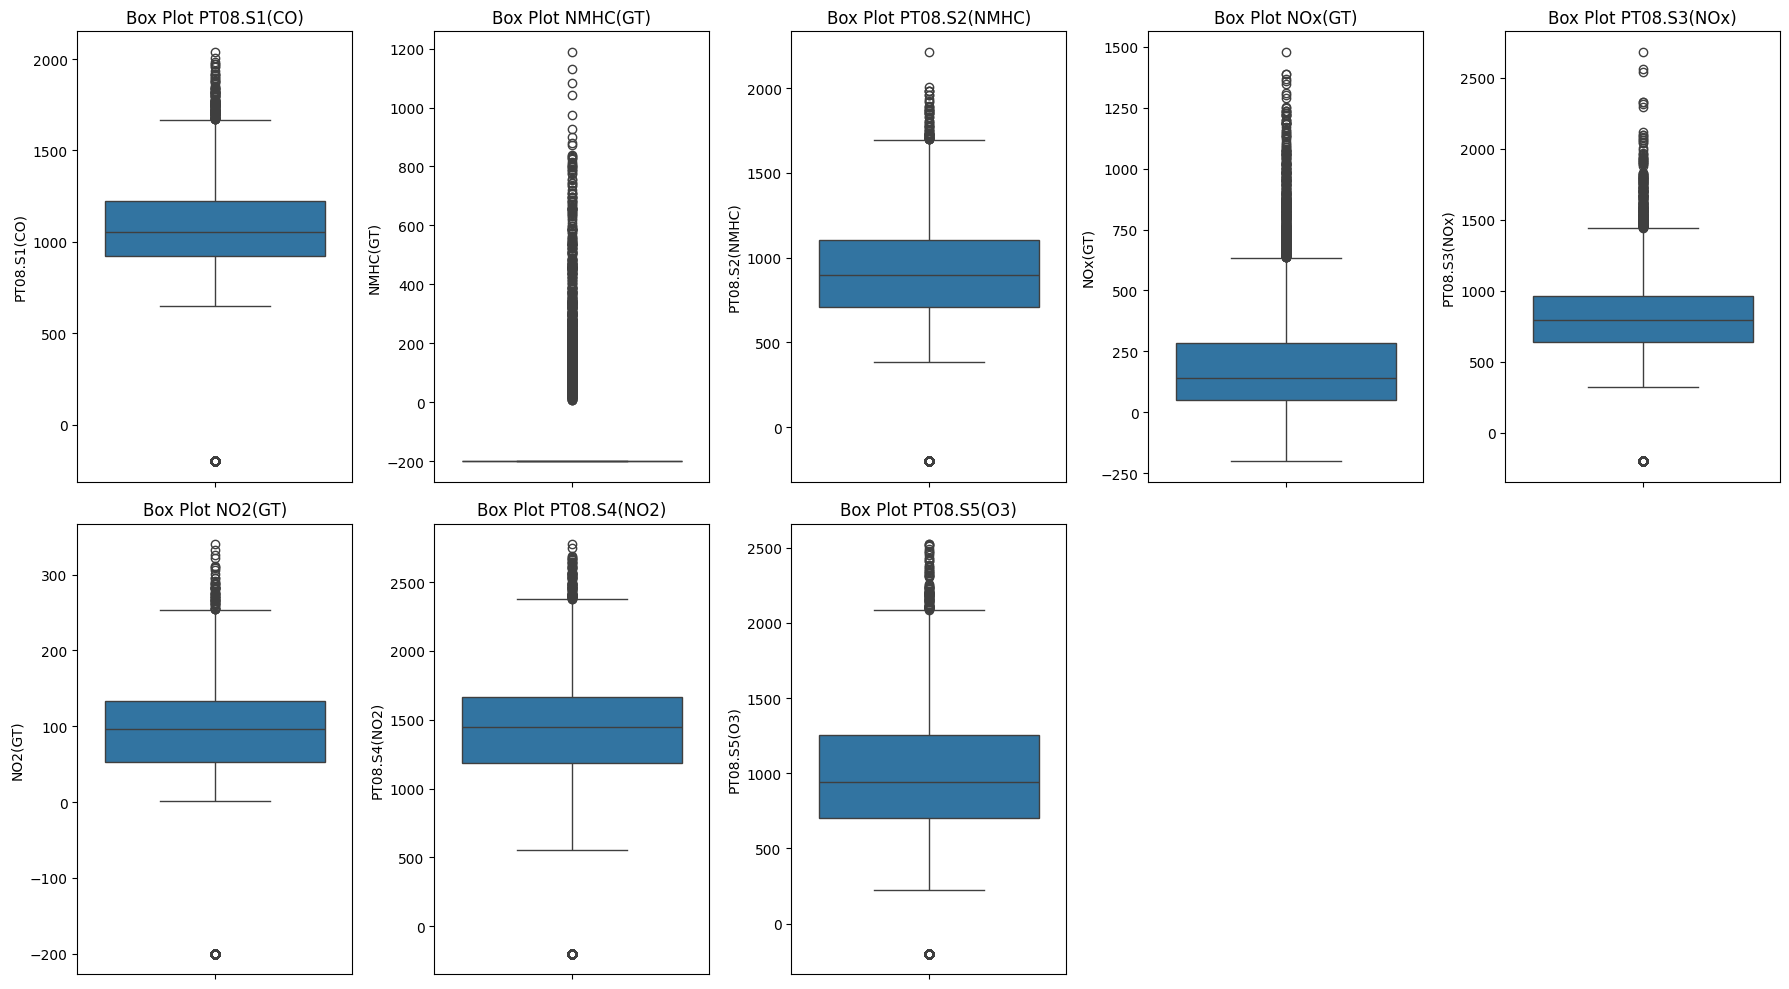

In [376]:
# 11. Distribution of numerical variables
# Create box plot untuk for each numerical variable
num_vars = len(numerical_columns)
ncols = 5
nrows = int(np.ceil(num_vars / ncols)) # Dynamically determine the number of rows based on the number of variables

# Create subplots with sizes adjusted to the number of variables
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()

# Loop through each numerical variable to create a box plot
# - Skip columns with only missing (NaN) values
# - Hide the subplot if the column has no valid data to avoid empty plots
for i, col in enumerate(numerical_columns):
    col_data = data[col].dropna()
    
    if col_data.empty:
        axes[i].set_visible(False)
        continue

    sns.boxplot(y=col_data, ax=axes[i])
    axes[i].set_title(f"Box Plot {col}")


# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [377]:
data_preprocessing = data.copy()

In [ ]:
# 1. Drop completely empty columns
data_preprocessing = data_preprocessing.drop(columns=["Unnamed: 15", "Unnamed: 16"])


In [379]:
# 2. Handling missing values
data_preprocessing = data_preprocessing.dropna()
print("(Recheck) Total missing values in each column")
display(data_preprocessing.isna().sum().to_frame(name="Total Missing Value").style.background_gradient("viridis"))

(Recheck) Total missing values in each column


,Total Missing Value
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [ ]:
# 3. Remove duplicates
data_preprocessing = data_preprocessing.drop_duplicates()
print("Duplicated values :", data_preprocessing.duplicated().sum())

Duplicated values : 0


In [381]:
# 4. Handling Outlier
# Calculate IQR and determine outlier thresholds for each numerical column
numeric_columns = data_preprocessing.select_dtypes(include="number").columns

outlier_counts = {}
lower_bounds = {}
upper_bounds = {}

for col in numeric_columns:
    Q1 = data_preprocessing[col].quantile(0.25)
    Q3 = data_preprocessing[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound

    outlier_counts[col] = ((data_preprocessing[col] < lower_bound) | (data_preprocessing[col] > upper_bound)).sum()

# Apply capping only to valid numeric fields (not targets)
data_preprocessing[numeric_columns] = data_preprocessing[numeric_columns].clip(lower=pd.Series(lower_bounds), upper=pd.Series(upper_bounds), axis=1)

# Verification of results
outlier_counts_after = {
    col: ((data_preprocessing[col] < lower_bounds[col]) | (data_preprocessing[col] > upper_bounds[col])).sum()
    for col in numeric_columns
}

outlier_counts_after_data = pd.DataFrame.from_dict(outlier_counts_after, orient="index", columns=["The Number of Outliers After Capping"])

print("Number of Outliers After Capping in Each Column:")
display(outlier_counts_after_data.style.background_gradient(cmap="viridis"))


Number of Outliers After Capping in Each Column:


,The Number of Outliers After Capping
PT08.S1(CO),0
NMHC(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [382]:
# 5. Feature Engineering 

# Convert "Date" column from object to datetime format
data_preprocessing["Date"] = pd.to_datetime(data_preprocessing["Date"], dayfirst=True)

# Extract useful time-based features
data_preprocessing["year"] = data_preprocessing["Date"].dt.year               # Extract year
data_preprocessing["month"] = data_preprocessing["Date"].dt.month             # Extract month
data_preprocessing["day"] = data_preprocessing["Date"].dt.day                 # Extract day of the month
data_preprocessing["dayofweek"] = data_preprocessing["Date"].dt.dayofweek     # Extract day of the week (0=Monday)
data_preprocessing["is_weekend"] = data_preprocessing["dayofweek"].isin([5, 6]).astype(int)  # 1 if Saturday or Sunday

# Drop the original "Date" column if no longer needed
data_preprocessing = data_preprocessing.drop(columns=["Date"])

In [383]:
# 6. Encoding Categorical Variables
categorical_cols = data_preprocessing.select_dtypes(include=["object"]).columns

le = LabelEncoder()

for col in categorical_cols:
    data_preprocessing[col] = le.fit_transform(data_preprocessing[col])

data_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   CO(GT)         9357 non-null   int64  
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   int64  
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   int64  
 12  RH             9357 non-null   int64  
 13  AH             9357 non-null   int64  
 14  year           9357 non-null   int32  
 15  month          9357 non-null   int32  
 16  day            9357 non-null   int32  
 17  dayofweek      9357 non-null   int32  
 18  is_weekend   

In [ ]:
# 7. Standardization
numeric_columns = data_preprocessing.select_dtypes(include="number").columns

scaler = StandardScaler()
data_preprocessing[numeric_columns] = scaler.fit_transform(data_preprocessing[numeric_columns])

In [385]:
data_preprocessing.head().style.background_gradient(cmap="viridis")

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,dayofweek,is_weekend
0,0.939133,0.631982,1.184300,0.000000,-1.098203,0.459421,0.033446,0.942714,0.390972,0.712915,0.653667,-0.937655,0.058844,-0.664717,-0.562169,-0.962879,-0.667207,-0.504915,-0.634869
1,1.083583,0.254807,0.902791,0.000000,1.409175,0.159958,-0.240036,1.383158,0.131712,0.368725,-0.009573,-0.962376,-0.006071,-0.752837,-0.562169,-0.962879,-0.667207,-0.504915,-0.634869
2,1.228033,0.416453,1.358173,0.000000,1.381546,0.107305,-0.118488,1.256250,0.403318,0.358373,0.218976,-1.077737,0.334733,-0.687138,-0.562169,-0.962879,-0.667207,-0.504915,-0.634869
3,1.372483,0.416453,1.250537,0.000000,1.395361,0.136922,0.059492,1.077087,0.502083,0.433422,0.508023,-1.151899,0.659307,-0.581288,-0.562169,-0.962879,-0.667207,-0.504915,-0.634869
4,1.516933,-0.176250,0.819994,0.000000,1.201954,-0.231649,-0.118488,1.498868,0.428009,0.190160,0.299640,-1.135418,0.637669,-0.576074,-0.562169,-0.962879,-0.667207,-0.504915,-0.634869


In [386]:
# Save the CSV file
data_preprocessing.to_csv("air_quality_preprocessing.csv", index=False) 
print("Successfully Save the CSV File")

Successfully Save the CSV File
